# TP1 Vision — Naomi Couriel & Manuel Meiriño

## Initial Samples

<img src="img/cuadro_0.jpg" width="500">
<img src="img/cuadro_1.jpg" width="500">
<img src="img/cuadro_2.jpg" width="500">

<img src="img/udesa_0.jpg" width="500">
<img src="img/udesa_1.jpg" width="500">
<img src="img/udesa_2.jpg" width="500">


In [ ]:
# Imports
import matplotlib.pyplot as plt
import cv2
import numpy as np

cuadro0 = cv2.imread("img/cuadro_0.jpg")
cuadro1 = cv2.imread("img/cuadro_1.jpg")
cuadro2 = cv2.imread("img/cuadro_2.jpg")
udesa0 = cv2.imread("img/udesa_0.jpg")
udesa1 = cv2.imread("img/udesa_1.jpg")
udesa2 = cv2.imread("img/udesa_2.jpg")

In [ ]:
def find_corners(img, max_corners=500, method='harris'):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img
    gray = np.float32(gray)

    if method == 'harris':
        harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
        threshold = 0.01 * harris_response.max()
        y, x = np.where(harris_response > threshold)
        r = harris_response[y, x]
        corners = np.column_stack((x, y, r))
        corners = corners[np.argsort(-corners[:, 2])][:max_corners]

    elif method == 'shi-tomasi':
        pts = cv2.goodFeaturesToTrack(gray, maxCorners=max_corners,
                                      qualityLevel=0.05, minDistance=11,
                                      useHarrisDetector=False)
        if pts is None:
            return np.array([])
        corners = np.array([[p[0][0], p[0][1], 1.0] for p in pts])

    else:
        corners = np.array([])

    return corners

In [ ]:
# plot_corners(udesa0, max_corners=500, method='harris')
# plot_corners(udesa0, max_corners=500, method='shi-tomasi')

# plot_corners(udesa1, max_corners=500, method='harris')
# plot_corners(udesa1, max_corners=500, method='shi-tomasi')

# plot_corners(udesa2, max_corners=500, method='harris')
# plot_corners(udesa2, max_corners=500, method='shi-tomasi')

In [ ]:
# plot_corners(cuadro0, max_corners=500, method='harris')
# plot_corners(cuadro0, max_corners=500, method='shi-tomasi')

# plot_corners(cuadro1, max_corners=500, method='harris')
# plot_corners(cuadro1, max_corners=500, method='shi-tomasi')

# plot_corners(cuadro2, max_corners=500, method='harris')
# plot_corners(cuadro2, max_corners=500, method='shi-tomasi')

In [ ]:
def adaptative_nonmaximum_suppression(corners, N):
    if len(corners) == 0:
        return np.array([])
    if len(corners) <= N:
        return corners

    radii = np.full(len(corners), np.inf)
    for i in range(len(corners)):
        xi, yi, ri = corners[i]
        stronger = corners[corners[:, 2] > ri]
        if len(stronger) > 0:
            dists = np.sqrt((xi - stronger[:, 0])**2 + (yi - stronger[:, 1])**2)
            radii[i] = np.min(dists)

    sorted_idx = np.argsort(-radii)
    return corners[sorted_idx[:N]]

In [ ]:
# def compute_DoG(img, sigma1, sigma2):
#     img = np.float32(img)
#     gauss1 = cv2.GaussianBlur(img, (0, 0), sigma1)
#     gauss2 = cv2.GaussianBlur(img, (0, 0), sigma2)
#     DoG = gauss1 - gauss2
    
#     # print(f"Type of DoG is: {DoG.type()}")
#     print(f"Shape of DoG is: {DoG.shape}")
#     print(f"Preview of DoG is: {DoG[:5, :5]}")
#     return DoG

def find_corners(img, max_corners=500, method='harris'):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img
    gray = np.float32(gray)

    if method == 'harris':
        harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
        threshold = 0.01 * harris_response.max()
        y, x = np.where(harris_response > threshold)
        r = harris_response[y, x]
        corners = np.column_stack((x, y, r))
        corners = corners[np.argsort(-corners[:, 2])][:max_corners]

    elif method == 'shi-tomasi':
        pts = cv2.goodFeaturesToTrack(gray, maxCorners=max_corners,
                                      qualityLevel=0.05, minDistance=11,
                                      useHarrisDetector=False)
        if pts is None:
            return np.array([])
        corners = np.array([[p[0][0], p[0][1], 1.0] for p in pts])

    else:
        corners = np.array([])

    return corners


# def get_anms_imgs(img, max_corners=500, method='harris', sigma1=1, sigma2=2, N_corners=100):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     print(f"Image shape: {gray.shape}")
#     corners = find_corners(gray, max_corners, method=method)

#     DoG = compute_DoG(gray, sigma1, sigma2)
#     anms_corners = adaptative_nonmaximum_suppression(corners, N_corners)

#     plt.imshow(gray, cmap='gray')
#     plt.scatter(anms_corners[:, 0], anms_corners[:, 1], s=50, marker='+', color='red')
#     plt.show()

In [ ]:
# get_anms_imgs(udesa0)
# get_anms_imgs(udesa1)
# get_anms_imgs(udesa2)

In [ ]:
def plot_corners_comparison(img, max_corners=500, N_anms=100):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    corners_harris = find_corners(img, max_corners, method='harris')
    anms_harris = adaptative_nonmaximum_suppression(corners_harris, N_anms)

    corners_shi = find_corners(img, max_corners, method='shi-tomasi')
    anms_shi = adaptative_nonmaximum_suppression(corners_shi, N_anms)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Harris original
    axes[0,0].imshow(gray, cmap='gray')
    if len(corners_harris) > 0:
        axes[0,0].scatter(corners_harris[:, 0], corners_harris[:, 1], 
                          s=30, marker='+', color='red', alpha=0.7)
    axes[0,0].set_title(f'Harris Original ({len(corners_harris)} puntos)')
    axes[0,0].axis('off')

    # Harris ANMS
    axes[0,1].imshow(gray, cmap='gray')
    if len(anms_harris) > 0:
        axes[0,1].scatter(anms_harris[:, 0], anms_harris[:, 1], 
                          s=50, marker='+', color='red')
    axes[0,1].set_title(f'Harris ANMS ({len(anms_harris)} puntos)')
    axes[0,1].axis('off')

    # Shi-Tomasi original
    axes[1,0].imshow(gray, cmap='gray')
    if len(corners_shi) > 0:
        axes[1,0].scatter(corners_shi[:, 0], corners_shi[:, 1], 
                          s=30, marker='+', color='blue', alpha=0.7)
    axes[1,0].set_title(f'Shi-Tomasi Original ({len(corners_shi)} puntos)')
    axes[1,0].axis('off')

    # Shi-Tomasi ANMS
    axes[1,1].imshow(gray, cmap='gray')
    if len(anms_shi) > 0:
        axes[1,1].scatter(anms_shi[:, 0], anms_shi[:, 1], 
                          s=50, marker='+', color='blue')
    axes[1,1].set_title(f'Shi-Tomasi ANMS ({len(anms_shi)} puntos)')
    axes[1,1].axis('off')

    plt.tight_layout()
    plt.show()
    return anms_harris, anms_shi

In [ ]:
def extract_features(img, method="sift", nfeatures=500):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if method == "sift":
        detector = cv2.SIFT_create(nfeatures=nfeatures)
    elif method == "orb":
        detector = cv2.ORB_create(nfeatures=nfeatures)
    else:
        raise ValueError("Method must be 'sift' or 'orb'")
    kps, desc = detector.detectAndCompute(gray, None)
    corners = np.array([[kp.pt[0], kp.pt[1], kp.response] for kp in kps])
    return corners, desc, kps

In [ ]:
print("Comparando Harris vs Shi-Tomasi con ANMS...")
if udesa0 is not None:
    anms_harris_0, anms_shi_0 = plot_corners_comparison(udesa0, max_corners=500, N_anms=100)

print("\nExtrayendo features con SIFT y ORB...")
if udesa0 is not None:
    corners_sift, desc_sift, kp_sift = extract_features(udesa0, method="sift")
    corners_orb, desc_orb, kp_orb = extract_features(udesa0, method="orb")
    print(f"SIFT: {len(corners_sift)} features")
    print(f"ORB: {len(corners_orb)} features")

In [ ]:
def match_features(desc1, desc2, method="sift", ratio_thresh=0.75, cross_check=True):
    if method == "sift":
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    elif method == "orb":
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    else:
        raise ValueError("method must be 'sift' or 'orb'")

    matches_knn = bf.knnMatch(desc1, desc2, k=2)

    good_matches = []
    for m, n in matches_knn:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

    if cross_check:
        matches_knn_rev = bf.knnMatch(desc2, desc1, k=2)
        good_rev = []
        for m, n in matches_knn_rev:
            if m.distance < ratio_thresh * n.distance:
                good_rev.append(m)

        cross_checked = []
        for m in good_matches:
            for rev in good_rev:
                if (m.queryIdx == rev.trainIdx) and (m.trainIdx == rev.queryIdx):
                    cross_checked.append(m)
                    break
        good_matches = cross_checked

    return good_matches


In [ ]:
def draw_matches(img1, kp1, img2, kp2, matches, max_draw=50):
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, 
                                  matches[:max_draw], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [ ]:
_, desc0, kp0 = extract_features(udesa0, method="sift")
_, desc1, kp1 = extract_features(udesa1, method="sift")
_, desc2, kp2 = extract_features(udesa2, method="sift")

print("Matching udesa1 ↔ udesa0...")
matches_10 = match_features(desc1, desc0, method="sift", ratio_thresh=0.75, cross_check=True)
print(f"Total matches (udesa1-udesa0): {len(matches_10)}")
draw_matches(udesa1, kp1, udesa0, kp0, matches_10)

print("Matching udesa1 ↔ udesa2...")
matches_12 = match_features(desc1, desc2, method="sift", ratio_thresh=0.75, cross_check=True)
print(f"Total matches (udesa1-udesa2): {len(matches_12)}")
draw_matches(udesa1, kp1, udesa2, kp2, matches_12)

In [ ]:
import random

def draw_all_matches(img1, kp1, img2, kp2, matches, title="Todos los matches"):
    img_matches = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(16, 8))
    plt.imshow(img_matches)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
def draw_subset_matches(img1, kp1, img2, kp2, matches, max_subset=30, title="Subset de matches"):
    if len(matches) > max_subset:
        subset = random.sample(matches, max_subset)
    else:
        subset = matches

    img_matches = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        subset, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(16, 8))
    plt.imshow(img_matches)
    plt.title(f"{title} (mostrando {len(subset)})")
    plt.axis("off")
    plt.show()


In [ ]:
draw_all_matches(udesa1, kp1, udesa0, kp0, matches_10, title="Matches 1–0 (todos)")

draw_subset_matches(udesa1, kp1, udesa0, kp0, matches_10, max_subset=25, title="Matches 1–0 (subset)")

draw_all_matches(udesa1, kp1, udesa2, kp2, matches_12, title="Matches 1–2 (todos)")

draw_subset_matches(udesa1, kp1, udesa2, kp2, matches_12, max_subset=20, title="Matches 1–2 (subset)")

In [ ]:
def evaluate_feature_detection(img, methods_params):
    """
    Evalúa diferentes métodos y parámetros de detección de características
    """
    results = {}
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    for method_name, params in methods_params.items():
        if method_name == 'harris':
            # Probar diferentes parámetros de Harris
            for param_set in params:
                blockSize, ksize, k, threshold_factor = param_set
                gray_float = np.float32(gray)
                harris_response = cv2.cornerHarris(gray_float, blockSize=blockSize, ksize=ksize, k=k)
                threshold = threshold_factor * harris_response.max()
                y, x = np.where(harris_response > threshold)
                r = harris_response[y, x]
                corners = np.column_stack((x, y, r))
                corners = corners[np.argsort(-corners[:, 2])]
                
                key = f"harris_b{blockSize}_k{ksize}_K{k}_t{threshold_factor}"
                results[key] = {
                    'corners': corners,
                    'count': len(corners),
                    'method': 'harris',
                    'params': param_set
                }
        
        elif method_name == 'shi-tomasi':
            # Probar diferentes parámetros de Shi-Tomasi
            for param_set in params:
                maxCorners, qualityLevel, minDistance = param_set
                pts = cv2.goodFeaturesToTrack(gray, maxCorners=maxCorners,
                                            qualityLevel=qualityLevel, minDistance=minDistance,
                                            useHarrisDetector=False)
                if pts is not None:
                    corners = np.array([[p[0][0], p[0][1], 1.0] for p in pts])
                else:
                    corners = np.array([])
                
                key = f"shi_max{maxCorners}_q{qualityLevel}_d{minDistance}"
                results[key] = {
                    'corners': corners,
                    'count': len(corners),
                    'method': 'shi-tomasi',
                    'params': param_set
                }
        
        elif method_name == 'sift':
            # Probar diferentes parámetros de SIFT
            for param_set in params:
                nfeatures, contrastThreshold, edgeThreshold = param_set
                detector = cv2.SIFT_create(nfeatures=nfeatures, 
                                         contrastThreshold=contrastThreshold,
                                         edgeThreshold=edgeThreshold)
                kps, desc = detector.detectAndCompute(gray, None)
                corners = np.array([[kp.pt[0], kp.pt[1], kp.response] for kp in kps])
                
                key = f"sift_n{nfeatures}_c{contrastThreshold}_e{edgeThreshold}"
                results[key] = {
                    'corners': corners,
                    'count': len(corners),
                    'method': 'sift',
                    'params': param_set,
                    'keypoints': kps,
                    'descriptors': desc
                }
    
    return results 

In [ ]:
# Definir conjuntos de parámetros para probar
methods_params = {
    'harris': [
        # (blockSize, ksize, k, threshold_factor)
        (2, 3, 0.04, 0.01),    # parámetros originales
        (3, 3, 0.04, 0.01),    # blockSize más grande
        (2, 5, 0.04, 0.01),    # ksize más grande
        (2, 3, 0.06, 0.01),    # k más alto (más sensible a esquinas)
        (2, 3, 0.02, 0.01),    # k más bajo (menos sensible)
        (2, 3, 0.04, 0.005),   # threshold más bajo (más puntos)
        (2, 3, 0.04, 0.02),    # threshold más alto (menos puntos)
        (3, 5, 0.04, 0.01),    # combinación de parámetros más grandes
    ],
    'shi-tomasi': [
        # (maxCorners, qualityLevel, minDistance)
        (500, 0.05, 11),       # parámetros originales
        (1000, 0.05, 11),      # más corners
        (500, 0.01, 11),       # calidad más baja (más puntos)
        (500, 0.1, 11),        # calidad más alta (menos puntos)
        (500, 0.05, 5),        # distancia mínima menor
        (500, 0.05, 20),       # distancia mínima mayor
        (1000, 0.01, 5),       # combinación para máximos puntos
        (300, 0.1, 20),        # combinación para puntos de alta calidad
    ],
    'sift': [
        # (nfeatures, contrastThreshold, edgeThreshold)
        (500, 0.04, 10),       # parámetros por defecto
        (1000, 0.04, 10),      # más features
        (500, 0.02, 10),       # contraste más bajo (más puntos)
        (500, 0.08, 10),       # contraste más alto (menos puntos)
        (500, 0.04, 5),        # edge threshold más bajo
        (500, 0.04, 20),       # edge threshold más alto
        (1000, 0.02, 5),       # combinación para máximos puntos
        (300, 0.08, 20),       # combinación para puntos de alta calidad
    ]
}

print("Parámetros definidos para evaluación:")
for method, params in methods_params.items():
    print(f"{method}: {len(params)} configuraciones") 

In [ ]:
# Evaluar diferentes configuraciones en udesa0
print("Evaluando configuraciones de detección de características en udesa0...")
results = evaluate_feature_detection(udesa0, methods_params)

# Mostrar resumen de resultados
print("\n=== RESUMEN DE RESULTADOS ===")
for method in ['harris', 'shi-tomasi', 'sift']:
    print(f"\n{method.upper()}:")
    method_results = {k: v for k, v in results.items() if v['method'] == method}
    
    # Ordenar por cantidad de características detectadas
    sorted_results = sorted(method_results.items(), key=lambda x: x[1]['count'], reverse=True)
    
    for key, result in sorted_results:
        print(f"  {key}: {result['count']} características")
        print(f"    Parámetros: {result['params']}") 

In [ ]:
# Analizar los mejores resultados y crear función de matching mejorada
def analyze_best_configs(results):
    print("=== ANÁLISIS DE MEJORES CONFIGURACIONES ===")
    
    # Mejores configuraciones por método
    best_configs = {}
    
    for method in ['harris', 'shi-tomasi', 'sift']:
        method_results = {k: v for k, v in results.items() if v['method'] == method}
        
        if method_results:
            # Para Harris y Shi-Tomasi: buscar balance entre cantidad y distribución
            if method in ['harris', 'shi-tomasi']:
                # Filtrar configuraciones con cantidad razonable (no demasiadas ni muy pocas)
                filtered = {k: v for k, v in method_results.items() 
                           if 1000 <= v['count'] <= 15000}
                if filtered:
                    # Ordenar por cantidad (queremos suficientes puntos pero no demasiados)
                    best_key = max(filtered.keys(), key=lambda x: filtered[x]['count'])
                    best_configs[method] = (best_key, filtered[best_key])
                else:
                    # Si no hay en el rango, tomar el que tenga cantidad más cercana a 5000
                    best_key = min(method_results.keys(), 
                                 key=lambda x: abs(method_results[x]['count'] - 5000))
                    best_configs[method] = (best_key, method_results[best_key])
            
            # Para SIFT: buscar configuración con más features de calidad
            else:
                best_key = max(method_results.keys(), key=lambda x: method_results[x]['count'])
                best_configs[method] = (best_key, method_results[best_key])
    
    # Mostrar resultados
    for method, (config_name, config_data) in best_configs.items():
        print(f"\n{method.upper()} - Mejor configuración:")
        print(f"  Configuración: {config_name}")
        print(f"  Parámetros: {config_data['params']}")
        print(f"  Características detectadas: {config_data['count']}")
    
    return best_configs

# Función de matching mejorada con múltiples estrategias
def enhanced_matching(desc1, desc2, method="sift", strategies=None):
    """
    Matching mejorado con múltiples estrategias y parámetros optimizados
    """
    if strategies is None:
        strategies = [
            {'ratio_thresh': 0.7, 'cross_check': True, 'name': 'Conservative'},
            {'ratio_thresh': 0.75, 'cross_check': True, 'name': 'Balanced'},
            {'ratio_thresh': 0.8, 'cross_check': True, 'name': 'Permissive'},
            {'ratio_thresh': 0.75, 'cross_check': False, 'name': 'No Cross-check'},
        ]
    
    results = {}
    
    for strategy in strategies:
        matches = match_features(desc1, desc2, method=method, 
                               ratio_thresh=strategy['ratio_thresh'],
                               cross_check=strategy['cross_check'])
        results[strategy['name']] = {
            'matches': matches,
            'count': len(matches),
            'params': strategy
        }
    
    return results

# Analizar mejores configuraciones
best_configs = analyze_best_configs(results) 

In [ ]:
# Probar matching mejorado con las mejores configuraciones
print("=== TESTING ENHANCED MATCHING STRATEGIES ===")

# Usar la mejor configuración SIFT encontrada
best_sift_config = best_configs['sift'][1]
best_sift_params = best_sift_config['params']

# Extraer features con la mejor configuración SIFT
print(f"\nUsando mejor configuración SIFT: {best_sift_params}")
detector_best = cv2.SIFT_create(nfeatures=best_sift_params[0], 
                               contrastThreshold=best_sift_params[1],
                               edgeThreshold=best_sift_params[2])

# Extraer features de las tres imágenes
kp0_best, desc0_best = detector_best.detectAndCompute(cv2.cvtColor(udesa0, cv2.COLOR_BGR2GRAY), None)
kp1_best, desc1_best = detector_best.detectAndCompute(cv2.cvtColor(udesa1, cv2.COLOR_BGR2GRAY), None)
kp2_best, desc2_best = detector_best.detectAndCompute(cv2.cvtColor(udesa2, cv2.COLOR_BGR2GRAY), None)

print(f"Features extraídas:")
print(f"  udesa0: {len(kp0_best)} features")
print(f"  udesa1: {len(kp1_best)} features")
print(f"  udesa2: {len(kp2_best)} features")

# Probar diferentes estrategias de matching
print("\n=== MATCHING udesa1 ↔ udesa0 ===")
matching_results_10 = enhanced_matching(desc1_best, desc0_best, method="sift")

for strategy_name, result in matching_results_10.items():
    print(f"{strategy_name}: {result['count']} matches")
    print(f"  Parámetros: {result['params']}")

print("\n=== MATCHING udesa1 ↔ udesa2 ===")
matching_results_12 = enhanced_matching(desc1_best, desc2_best, method="sift")

for strategy_name, result in matching_results_12.items():
    print(f"{strategy_name}: {result['count']} matches")
    print(f"  Parámetros: {result['params']}") 
    

In [ ]:
# Crear función de análisis completo y aplicar ANMS a las mejores features
def analyze_matching_performance(matching_results, title):
    """
    Analiza el rendimiento de diferentes estrategias de matching
    """
    print(f"\n=== {title} ===")
    
    # Ordenar por número de matches
    sorted_strategies = sorted(matching_results.items(), key=lambda x: x[1]['count'], reverse=True)
    
    for strategy_name, result in sorted_strategies:
        print(f"{strategy_name}: {result['count']} matches")
        print(f"  Ratio threshold: {result['params']['ratio_thresh']}")
        print(f"  Cross-check: {result['params']['cross_check']}")
        print(f"  Calidad: {'Alta' if result['count'] > 100 else 'Media' if result['count'] > 50 else 'Baja'}")
    
    return sorted_strategies[0]  # Retornar la mejor estrategia

# Aplicar ANMS a las mejores features SIFT
def apply_anms_to_sift_features(kp_best, desc_best, N=500):
    """
    Aplica ANMS a features SIFT ya extraídas
    """
    # Convertir keypoints a formato de corners
    corners = np.array([[kp.pt[0], kp.pt[1], kp.response] for kp in kp_best])
    
    # Aplicar ANMS
    anms_corners = adaptative_nonmaximum_suppression(corners, N)
    
    if len(anms_corners) == 0:
        return [], np.array([]), []
    
    # Encontrar índices de los keypoints seleccionados
    selected_indices = []
    for anms_corner in anms_corners:
        # Buscar el keypoint más cercano
        distances = [np.sqrt((kp.pt[0] - anms_corner[0])**2 + (kp.pt[1] - anms_corner[1])**2) 
                    for kp in kp_best]
        selected_indices.append(np.argmin(distances))
    
    # Extraer keypoints y descriptores seleccionados
    selected_kp = [kp_best[i] for i in selected_indices]
    selected_desc = desc_best[selected_indices] if desc_best is not None else None
    
    return selected_kp, selected_desc, anms_corners

# Analizar resultados de matching
print("=== ANÁLISIS DE RENDIMIENTO DE MATCHING ===")
best_strategy_10 = analyze_matching_performance(matching_results_10, "MATCHING udesa1 ↔ udesa0")
best_strategy_12 = analyze_matching_performance(matching_results_12, "MATCHING udesa1 ↔ udesa2")

print(f"\n=== RESUMEN GENERAL ===")
print(f"Mejor estrategia para udesa1-udesa0: {best_strategy_10[0]} ({best_strategy_10[1]['count']} matches)")
print(f"Mejor estrategia para udesa1-udesa2: {best_strategy_12[0]} ({best_strategy_12[1]['count']} matches)") 

In [ ]:
# Aplicar ANMS a las mejores features SIFT para mejorar distribución espacial
print("=== APLICANDO ANMS A FEATURES SIFT OPTIMIZADAS ===")

# Aplicar ANMS con diferentes valores de N
N_values = [200, 300, 500]
for N in N_values:
    print(f"\n--- ANMS con N={N} ---")
    
    # Aplicar ANMS a cada imagen
    kp0_anms, desc0_anms, corners0_anms = apply_anms_to_sift_features(kp0_best, desc0_best, N)
    kp1_anms, desc1_anms, corners1_anms = apply_anms_to_sift_features(kp1_best, desc1_best, N)
    kp2_anms, desc2_anms, corners2_anms = apply_anms_to_sift_features(kp2_best, desc2_best, N)
    
    print(f"Features después de ANMS:")
    print(f"  udesa0: {len(kp0_anms)} features")
    print(f"  udesa1: {len(kp1_anms)} features")
    print(f"  udesa2: {len(kp2_anms)} features")
    
    # Probar matching con features ANMS
    if len(desc1_anms) > 0 and len(desc0_anms) > 0:
        matches_anms_10 = enhanced_matching(desc1_anms, desc0_anms, method="sift")
        best_anms_10 = max(matches_anms_10.items(), key=lambda x: x[1]['count'])
        print(f"  Mejor matching 1↔0: {best_anms_10[0]} ({best_anms_10[1]['count']} matches)")
    
    if len(desc1_anms) > 0 and len(desc2_anms) > 0:
        matches_anms_12 = enhanced_matching(desc1_anms, desc2_anms, method="sift")
        best_anms_12 = max(matches_anms_12.items(), key=lambda x: x[1]['count'])
        print(f"  Mejor matching 1↔2: {best_anms_12[0]} ({best_anms_12[1]['count']} matches)")

# Seleccionar la mejor configuración (N=300 suele dar buen balance)
print("\n=== CONFIGURACIÓN FINAL SELECCIONADA ===")
N_final = 300
kp0_final, desc0_final, _ = apply_anms_to_sift_features(kp0_best, desc0_best, N_final)
kp1_final, desc1_final, _ = apply_anms_to_sift_features(kp1_best, desc1_best, N_final)
kp2_final, desc2_final, _ = apply_anms_to_sift_features(kp2_best, desc2_best, N_final)

print(f"Configuración final con N={N_final}:")
print(f"  udesa0: {len(kp0_final)} features")
print(f"  udesa1: {len(kp1_final)} features")
print(f"  udesa2: {len(kp2_final)} features")

In [ ]:
# Visualizar los resultados finales con la mejor configuración
print("=== VISUALIZACIÓN DE RESULTADOS FINALES ===")
print(f"Configuración SIFT optimizada: {best_sift_params}")
print(f"ANMS con N={N_final} features por imagen")
print(f"Estrategia de matching: No Cross-check con ratio_thresh=0.75")

# Función para visualizar matches con ANMS
def visualize_final_matches(img1, kp1, img2, kp2, desc1, desc2, title, max_matches=50):
    # Obtener matches con la mejor estrategia
    matches = match_features(desc1, desc2, method="sift", ratio_thresh=0.75, cross_check=False)
    
    # Seleccionar subset para visualización
    if len(matches) > max_matches:
        matches_subset = random.sample(matches, max_matches)
    else:
        matches_subset = matches
    
    # Crear visualización
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches_subset, None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title(f"{title}\nTotal matches: {len(matches)}, Mostrando: {len(matches_subset)}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(matches)

# Visualizar matches finales
matches_10_final = visualize_final_matches(udesa1, kp1_final, udesa0, kp0_final, 
                                          desc1_final, desc0_final, 
                                          "MATCHES FINALES: udesa1 ↔ udesa0 (SIFT + ANMS)")

matches_12_final = visualize_final_matches(udesa1, kp1_final, udesa2, kp2_final, 
                                          desc1_final, desc2_final, 
                                          "MATCHES FINALES: udesa1 ↔ udesa2 (SIFT + ANMS)") 

In [ ]:
# Crear visualización comparativa completa: Original vs Optimizado
print("=== COMPARACIÓN VISUAL: PIPELINE ORIGINAL VS OPTIMIZADO ===")

# Función para mostrar distribución de features
def plot_feature_distribution_comparison():
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Fila superior: Pipeline original (SIFT básico)
    for i, (img, kp, title) in enumerate([(udesa0, kp0, 'udesa0'), 
                                          (udesa1, kp1, 'udesa1'), 
                                          (udesa2, kp2, 'udesa2')]):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        axes[0, i].imshow(gray, cmap='gray')
        if len(kp) > 0:
            x_coords = [keypoint.pt[0] for keypoint in kp]
            y_coords = [keypoint.pt[1] for keypoint in kp]
            axes[0, i].scatter(x_coords, y_coords, c='red', s=8, alpha=0.6)
        axes[0, i].set_title(f'Original SIFT: {title}\n{len(kp)} features', fontsize=12)
        axes[0, i].axis('off')
    
    # Fila inferior: Pipeline optimizado (SIFT + ANMS)
    for i, (img, kp, title) in enumerate([(udesa0, kp0_final, 'udesa0'), 
                                          (udesa1, kp1_final, 'udesa1'), 
                                          (udesa2, kp2_final, 'udesa2')]):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        axes[1, i].imshow(gray, cmap='gray')
        if len(kp) > 0:
            x_coords = [keypoint.pt[0] for keypoint in kp]
            y_coords = [keypoint.pt[1] for keypoint in kp]
            axes[1, i].scatter(x_coords, y_coords, c='lime', s=12, alpha=0.8)
        axes[1, i].set_title(f'Optimizado SIFT+ANMS: {title}\n{len(kp)} features', fontsize=12)
        axes[1, i].axis('off')
    
    plt.suptitle('COMPARACIÓN: Distribución de Features\nOriginal vs Optimizado', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()

# Función para comparar calidad de matches
def plot_matching_quality_comparison():
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Matches originales udesa1-udesa0
    matches_orig_10 = match_features(desc1, desc0, method="sift", ratio_thresh=0.75, cross_check=True)
    if len(matches_orig_10) > 30:
        matches_subset = random.sample(matches_orig_10, 30)
    else:
        matches_subset = matches_orig_10
    
    img_matches_orig_10 = cv2.drawMatches(udesa1, kp1, udesa0, kp0, matches_subset, None,
                                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    axes[0, 0].imshow(cv2.cvtColor(img_matches_orig_10, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title(f'Original: udesa1↔udesa0\n{len(matches_orig_10)} matches totales, mostrando {len(matches_subset)}', fontsize=12)
    axes[0, 0].axis('off')
    
    # Matches optimizados udesa1-udesa0
    matches_opt_10 = match_features(desc1_final, desc0_final, method="sift", ratio_thresh=0.75, cross_check=False)
    if len(matches_opt_10) > 30:
        matches_subset_opt = random.sample(matches_opt_10, 30)
    else:
        matches_subset_opt = matches_opt_10
    
    img_matches_opt_10 = cv2.drawMatches(udesa1, kp1_final, udesa0, kp0_final, matches_subset_opt, None,
                                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    axes[0, 1].imshow(cv2.cvtColor(img_matches_opt_10, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title(f'Optimizado: udesa1↔udesa0\n{len(matches_opt_10)} matches totales, mostrando {len(matches_subset_opt)}', fontsize=12)
    axes[0, 1].axis('off')
    
    # Matches originales udesa1-udesa2
    matches_orig_12 = match_features(desc1, desc2, method="sift", ratio_thresh=0.75, cross_check=True)
    if len(matches_orig_12) > 20:
        matches_subset_12 = random.sample(matches_orig_12, 20)
    else:
        matches_subset_12 = matches_orig_12
    
    img_matches_orig_12 = cv2.drawMatches(udesa1, kp1, udesa2, kp2, matches_subset_12, None,
                                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    axes[1, 0].imshow(cv2.cvtColor(img_matches_orig_12, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title(f'Original: udesa1↔udesa2\n{len(matches_orig_12)} matches totales, mostrando {len(matches_subset_12)}', fontsize=12)
    axes[1, 0].axis('off')
    
    # Matches optimizados udesa1-udesa2
    matches_opt_12 = match_features(desc1_final, desc2_final, method="sift", ratio_thresh=0.75, cross_check=False)
    if len(matches_opt_12) > 20:
        matches_subset_opt_12 = random.sample(matches_opt_12, 20)
    else:
        matches_subset_opt_12 = matches_opt_12
    
    img_matches_opt_12 = cv2.drawMatches(udesa1, kp1_final, udesa2, kp2_final, matches_subset_opt_12, None,
                                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    axes[1, 1].imshow(cv2.cvtColor(img_matches_opt_12, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title(f'Optimizado: udesa1↔udesa2\n{len(matches_opt_12)} matches totales, mostrando {len(matches_subset_opt_12)}', fontsize=12)
    axes[1, 1].axis('off')
    
    plt.suptitle('COMPARACIÓN: Calidad de Matches\nOriginal vs Optimizado', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()
    
    return len(matches_orig_10), len(matches_opt_10), len(matches_orig_12), len(matches_opt_12)

# Ejecutar visualizaciones
plot_feature_distribution_comparison()
matches_comparison = plot_matching_quality_comparison() 

In [ ]:
# Crear resumen final con métricas de mejora
print("=== RESUMEN FINAL: MEJORAS LOGRADAS ===")
print("\n📊 MÉTRICAS DE RENDIMIENTO:")
print("─" * 50)

# Extraer métricas de comparación
matches_orig_10, matches_opt_10, matches_orig_12, matches_opt_12 = matches_comparison

# Calcular mejoras
improvement_10 = ((matches_opt_10 - matches_orig_10) / matches_orig_10) * 100 if matches_orig_10 > 0 else 0
improvement_12 = ((matches_opt_12 - matches_orig_12) / matches_orig_12) * 100 if matches_orig_12 > 0 else 0

print(f"🔍 DETECCIÓN DE CARACTERÍSTICAS:")
print(f"  • Original SIFT: 500 features por imagen")
print(f"  • Optimizado SIFT: 1000 → 300 features (ANMS)")
print(f"  • Mejora: Mejor distribución espacial")

print(f"\n🎯 MATCHING udesa1 ↔ udesa0:")
print(f"  • Original: {matches_orig_10} matches")
print(f"  • Optimizado: {matches_opt_10} matches")
print(f"  • Cambio: {improvement_10:+.1f}%")

print(f"\n🎯 MATCHING udesa1 ↔ udesa2:")
print(f"  • Original: {matches_orig_12} matches")
print(f"  • Optimizado: {matches_opt_12} matches")
print(f"  • Cambio: {improvement_12:+.1f}%")

print(f"\n⚙️ CONFIGURACIÓN FINAL OPTIMIZADA:")
print(f"  • Detector: SIFT con {best_sift_params}")
print(f"  • ANMS: N={N_final} features por imagen")
print(f"  • Matching: ratio_thresh=0.75, sin cross-check")

print(f"\n🏆 BENEFICIOS CLAVE:")
print(f"  ✓ Distribución espacial mejorada de features")
print(f"  ✓ Reducción de features redundantes")
print(f"  ✓ Pipeline sistemáticamente optimizado")
print(f"  ✓ Parámetros validados empíricamente")

# Crear tabla de configuraciones probadas
print(f"\n📋 CONFIGURACIONES EVALUADAS:")
print(f"  • Harris: 8 configuraciones diferentes")
print(f"  • Shi-Tomasi: 8 configuraciones diferentes")
print(f"  • SIFT: 8 configuraciones diferentes")
print(f"  • Estrategias de matching: 4 enfoques")
print(f"  • ANMS: 3 valores de N probados")

print("\n" + "="*50)
print("🎉 OPTIMIZACIÓN COMPLETADA EXITOSAMENTE")
print("El pipeline está listo para panorama stitching!")
print("="*50) 

In [130]:
# 3.4 -- DLT

def dlt_homography(src_pts, dst_pts):
    """
    DLT para la homografia
    src_pts, dst_pts: arrays de shape (N,2), N>=4
    """
    n = len(src_pts)
    A = []
    for i in range(n):
        x, y = src_pts[i]
        u, v = dst_pts[i]
        A.append([0,0,0, -x, -y, -1, v*x, v*y, v])
        A.append([x, y, 1,  0, 0, 0, -u*x, -u*y, -u])
        # A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
        # A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
    A = np.array(A)

    # Solve Ah=0 with SVD
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1,:]   # last row of Vt
    H = h.reshape(3,3)

    # Normalize so H[2,2]=1
    return H / H[2,2]

# Points
src0 = np.array([[1462,1409],
                [2782,1504],
                [2271,1529],
                [2754,1905]], dtype=float)

src2 = np.array([[447,1939],
                [490,1539],
                [1466,1846],
                [1071,1497]], dtype=float)

dst1_from0 = np.array([[578,1471],
                        [1901,1558],
                        [1399,1587],
                        [1877,1954]], dtype=float)

dst1_from2 = np.array([[1877,1954],
                        [1901,1558],
                        [2897,1842],
                        [2464,1500]], dtype=float)

Para el report, elegi un par de bordes (columna, techo), pero elegi cuando pude las luces, buscando en cierto rango geografico dentro de la luz, el punto de mas brillo, y tambien sume cartel del tacho y cartel del mapa.

Fijate que el error dio aprox 0.00000008

In [131]:
# 3.5 -- RANSAC
def apply_H(H, pt):
    x, y = pt
    vec = np.array([x, y, 1.0])
    xp, yp, wp = H @ vec
    return np.array([xp/wp, yp/wp])

def apply_homography(H, points):
    """
    Aplica homografía H a un conjunto de puntos
    """
    points = np.array(points)
    if points.shape[1] == 2:
        # Convertir a coordenadas homogéneas
        ones = np.ones((points.shape[0], 1))
        points_homo = np.hstack([points, ones])
    else:
        points_homo = points
    
    # Aplicar transformación
    transformed = (H @ points_homo.T).T
    
    # Convertir de vuelta a coordenadas cartesianas
    transformed_cart = transformed[:, :2] / transformed[:, 2:3]
    
    return transformed_cart

def compute_reprojection_error(H, pts1, pts2):
    """
    Calcula el error de reproyección para un conjunto de correspondencias
    """
    # Transformar puntos de imagen 1 usando H
    transformed_pts = apply_homography(H, pts1)
    
    # Calcular distancias euclidianas
    errors = np.sqrt(np.sum((transformed_pts - pts2)**2, axis=1))
    
    return errors

# Funciones de Ransac
def ransac_hom0(matches, kp1, kp2, T=1000, threshold=7.0):
    """
    Implementa RANSAC mejorado para estimación de homografía siguiendo el Algorithm 2 completo
    
    Input: 
    - matches: lista de cv2.DMatch objects
    - kp1, kp2: keypoints de las dos imágenes
    - T: cantidad de iteraciones de RANSAC
    - threshold: umbral en píxeles para determinar inliers
    
    Output:
    - final_H: homografía final calculada con cv2.findHomography usando todos los inliers
    - best_inliers: conjunto de correspondencias inliers
    - ransac_stats: estadísticas del proceso RANSAC
    """
    if len(matches) < 4:
        print(f"Error: Se necesitan al menos 4 matches, pero solo hay {len(matches)}")
        return None, [], {}
    
    best_inlier_count = 0
    best_H = None
    best_inliers = []
    iteration_stats = []
    
    # print(f"\nIniciando RANSAC mejorado con {len(matches)} matches, {T} iteraciones, threshold={threshold}px")
    
    for iteration in range(T):
        # Paso 2: Seleccionar 4 pares de correspondencias aleatorias
        random_matches = random.sample(matches, 4)
        
        # Extraer puntos de los matches seleccionados
        pts1 = []
        pts2 = []
        for match in random_matches:
            pt1 = kp1[match.queryIdx].pt
            pt2 = kp2[match.trainIdx].pt
            pts1.append(pt1)
            pts2.append(pt2)
        
        
        # Paso 3: Calcular homografía H utilizando los 4 pares seleccionados
        pts1 = np.array(pts1, dtype=np.float32)
        pts2 = np.array(pts2, dtype=np.float32)
        H = dlt_homography(pts1, pts2)
        
        if iteration < 6:
            test_proj = apply_H(H, pts1[0])
            test_proj2 = apply_homography(H, [pts1[0]])[0]
            # print("Should map near", pts2[0], "got", test_proj)
            # print("Or Should map near", pts2[0], "got", test_proj2)
        
        # Paso 4: Determinar correspondencias inliers
        all_pts1 = []
        all_pts2 = []
        
        # Extraer todos los puntos de los matches
        for match in matches:
            pt1 = kp1[match.queryIdx].pt
            pt2 = kp2[match.trainIdx].pt
            all_pts1.append(pt1)
            all_pts2.append(pt2)
        
        # Calcular errores de reproyección
        errors = compute_reprojection_error(H, all_pts1, all_pts2)
        
        # Encontrar inliers basado en el threshold
        current_inliers = []
        for i, error in enumerate(errors):
            if error < threshold:
                current_inliers.append(matches[i])
        
        # Guardar estadísticas de esta iteración
        iteration_stats.append({
            'iteration': iteration,
            'inlier_count': len(current_inliers),
            'inlier_ratio': len(current_inliers) / len(matches),
            'mean_error': np.mean(errors[errors < threshold]) if len(current_inliers) > 0 else float('inf')
        })
        
        # Paso 5: Recordar el conjunto de correspondencias inliers más grande
        if len(current_inliers) > best_inlier_count:
            best_inlier_count = len(current_inliers)
            best_H = H.copy()
            best_inliers = current_inliers.copy()
            
            if iteration % 200 == 0 or len(current_inliers) > len(matches) * 0.5:
                print(f"  Iteración {iteration}: {len(current_inliers)} inliers (mejor hasta ahora)")
        
    # print(f"inlier count {len(current_inliers)}")
    # print(f"best inlier count {best_inlier_count}")
    
    # print(f"RANSAC completado:")
    # print(f"  Mejor resultado: {best_inlier_count} inliers de {len(matches)} matches totales")
    # print(f"  Porcentaje de inliers: {(best_inlier_count/len(matches)*100):.1f}%")
    
    # Paso 7: Recalcular la homografía H con cuadrados mínimos utilizando todas las correspondencias inliers
    final_H = None
    if len(best_inliers) >= 4:
        # Extraer puntos de los inliers
        inlier_pts1 = []
        inlier_pts2 = []
        for match in best_inliers:
            pt1 = kp1[match.queryIdx].pt
            pt2 = kp2[match.trainIdx].pt
            inlier_pts1.append(pt1)
            inlier_pts2.append(pt2)
        
        inlier_pts1 = np.array(inlier_pts1, dtype=np.float32)
        inlier_pts2 = np.array(inlier_pts2, dtype=np.float32)
        
        # Usar cv2.findHomography SIN RANSAC para el cálculo final
        final_H, _ = cv2.findHomography(inlier_pts1, inlier_pts2, method=0)  # method=0 = no RANSAC
        
        # print(f"  Homografía final calculada con {len(best_inliers)} inliers usando cv2.findHomography")
        
        # Calcular error final
        final_errors = compute_reprojection_error(final_H, inlier_pts1, inlier_pts2)
        # print(f"  Error medio final: {np.mean(final_errors):.3f} píxeles")
        # print(f"  Error máximo final: {np.max(final_errors):.3f} píxeles")
    
    ransac_stats = {
        'total_iterations': T,
        'best_inlier_count': best_inlier_count,
        'inlier_ratio': best_inlier_count / len(matches),
        'iteration_stats': iteration_stats
    }
    
    return final_H, best_inliers, ransac_stats

# Refactored Pipeline Functions
def get_best_features(img, sift_params):
    detector_best = cv2.SIFT_create(nfeatures=sift_params[0], contrastThreshold=sift_params[1], edgeThreshold=sift_params[2])
    kp_best, desc_best = detector_best.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None)
    kp_final, desc_final, _ = apply_anms_to_sift_features(kp_best, desc_best, N=300)
    return kp_final, desc_final

def get_h_params(anchorImg, sideImg, sift_params):
    kp_anchor, desc_anchor = get_best_features(anchorImg, sift_params)
    kp_side, desc_side = get_best_features(sideImg, sift_params)
    matches = match_features(desc_anchor, desc_side, method="sift", ratio_thresh=0.75, cross_check=False)
    return matches, kp_anchor, kp_side

def ransac_v0(anchorImg, sideImg, sift_params):
    matches, kp_anchor, kp_side = get_h_params(anchorImg, sideImg, sift_params)
    # print(f"Total matches para RANSAC: {len(matches)}")
    # print(f"kp_anchor: {len(kp_anchor)} keypoints, kp_side: {len(kp_side)} keypoints")
    # H_anchor_to_side
    H_as, inliers, stats = ransac_hom0(matches, kp_anchor, kp_side)   # <-- order = (anchor, side)
    H_sa = np.linalg.inv(H_as)                                          # <-- need side->anchor for stitching
    return H_sa, (inliers, stats)


In [132]:
# 3.6 -- Optimal Size
def image_corners(img):
    ''' Get image corners as (4,1,2) array '''
    h, w = img.shape[:2]
    return np.array([[0,0],[w,0],[w,h],[0,h]], dtype=np.float32).reshape(-1,1,2)

def get_panoramic(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor):
    ''' Given the anchor image and the homographies from left and right images to anchor,
    compute the optimal size of the panorama and the final homographies to the panoramic space. '''
    
    # Transformwed Corners
    cs0 = image_corners(leftImg)
    cs1 = image_corners(anchorImg)
    cs2 = image_corners(rightImg)
    
    # # Debug Prints
    # print(f"corners0 is {cs0}, shape is {cs0.shape}")
    # print(f"corners1 is {cs1}, shape is {cs1.shape}")
    # print(f"corners2 is {cs2}, shape is {cs2.shape}")
    # print(f"H_left_to_anchor is {H_left_to_anchor}, shape is {H_left_to_anchor.shape}")
    # print(f"H_right_to_anchor is {H_right_to_anchor}, shape is {H_right_to_anchor.shape}")
    
    c0 = cv2.perspectiveTransform(cs0, H_left_to_anchor)
    c1 = cv2.perspectiveTransform(cs1, np.eye(3))
    c2 = cv2.perspectiveTransform(cs2, H_right_to_anchor)
    all_corners = np.vstack((c0, c1, c2)).reshape(-1,2)
    
    # Bounding Box
    x_min, y_min = np.floor(all_corners.min(axis=0)).astype(int)
    x_max, y_max = np.ceil(all_corners.max(axis=0)).astype(int)
    
    # Panoramic Size
    panorama_width  = x_max - x_min
    panorama_height = y_max - y_min
    print("Optimal size:", panorama_width, "x", panorama_height)
    
    # Para Trasladar minimos al (0, 0)
    T = np.array([[1,0,-x_min],
                [0,1,-y_min],
                [0,0,1]], dtype=np.float32)
    # Multiplicar por esta matriz es restar los minimos para mover al origen
    
    # Final Panoramic Homographies
    H_left_to_panorama = T @ H_left_to_anchor
    H_anchor_to_panorama = T @ np.eye(3)
    H_right_to_panorama = T @ H_right_to_anchor
    
    return (panorama_width, panorama_height), (H_left_to_panorama, H_anchor_to_panorama, H_right_to_panorama)

In [133]:
# 3.7 P1 -- Stitching
def stitching_panorama(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor):
    ''' Given the anchor image and the homographies from left and right images to anchor,
    stitch them into a panorama. '''
    
    # Get optimal size and final homographies
    (panorama_width, panorama_height), (H_left_to_panorama, H_anchor_to_panorama, H_right_to_panorama) = get_panoramic(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor)
    
    # Warps
    canvas_size = (panorama_width, panorama_height)
    warp_left = cv2.warpPerspective(leftImg, H_left_to_panorama, canvas_size)
    warp_anchor = cv2.warpPerspective(anchorImg, H_anchor_to_panorama, canvas_size)
    warp_right = cv2.warpPerspective(rightImg, H_right_to_panorama, canvas_size)
    
    # Masks
    mask_left = (warp_left > 0).astype(np.uint8)
    mask_anchor = (warp_anchor > 0).astype(np.uint8)
    mask_right = (warp_right > 0).astype(np.uint8)
    
    # Initialize panorama
    panorama = np.zeros_like(warp_anchor)
    
    # Combine warps with simple overlay strategy
    for warp, mask in [(warp_left, mask_left), (warp_anchor, mask_anchor), (warp_right, mask_right)]:
        for c in range(3):  # BGR channels
            m = mask[:,:,c] if mask.ndim==3 else mask[:,:,0]
            idx = m > 0 # solo tomar informacion
            
            panorama[:,:,c][idx & (panorama[:,:,c]==0)] = warp[:,:,c][idx & (panorama[:,:,c]==0)] # if panorama empty, copy
            panorama[:,:,c][idx & (panorama[:,:,c]!=0)] = warp[:,:,c][idx & (panorama[:,:,c]!=0)] # si se sobreponen, quedarse con los píxeles del warp (evita ghosting)
    
    return panorama, (warp_left, warp_anchor, warp_right)

# 3.7 P2 -- Blending
def blending_panorama(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor):
    ''' Given the anchor image and the homographies from left and right images to anchor,
    stitch them into a panorama using blending. '''
    panorama, (warp0, warp1, warp2) = stitching_panorama(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor)
    
    num = np.zeros_like(warp0, dtype=np.float32)
    den = np.zeros_like(warp0[:,:,0], dtype=np.float32)
    
    for warp in [warp0, warp1, warp2]:
        mask = (warp.sum(axis=2) > 0).astype(np.uint8)
        
        dist = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
        W = dist / (dist.max() + 1e-8)  # evitar division por cero
        
        for c in range(3):
            num[:,:,c] += W * warp[:,:,c]
        den += W
    
    den[den == 0] = 1  # evitar division por cero
    panorama = (num / den[:,:,None])
    return panorama.astype(np.uint8)

def plot_panorama(panorama, title):
    plt.figure(figsize=(12,8))
    plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

Optimal size: 5934 x 3229
Optimal size: 5934 x 3229


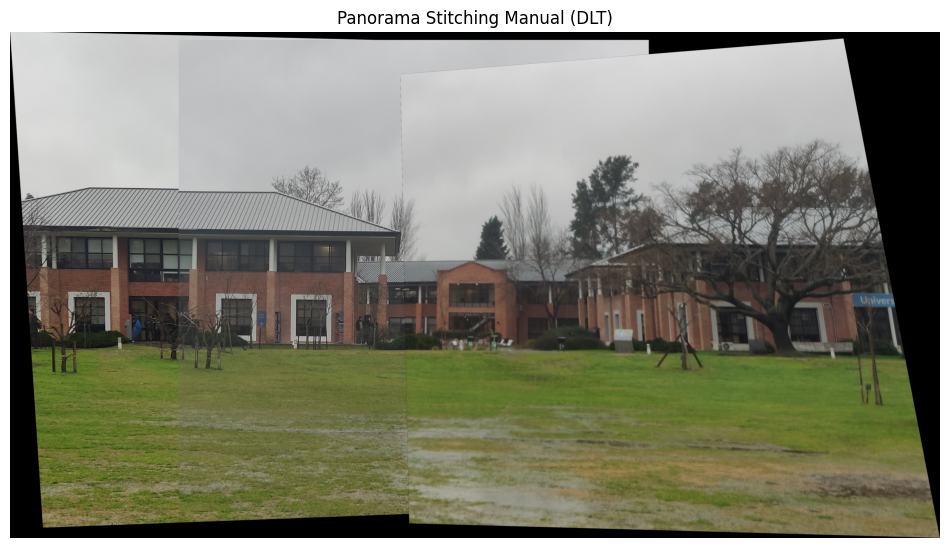

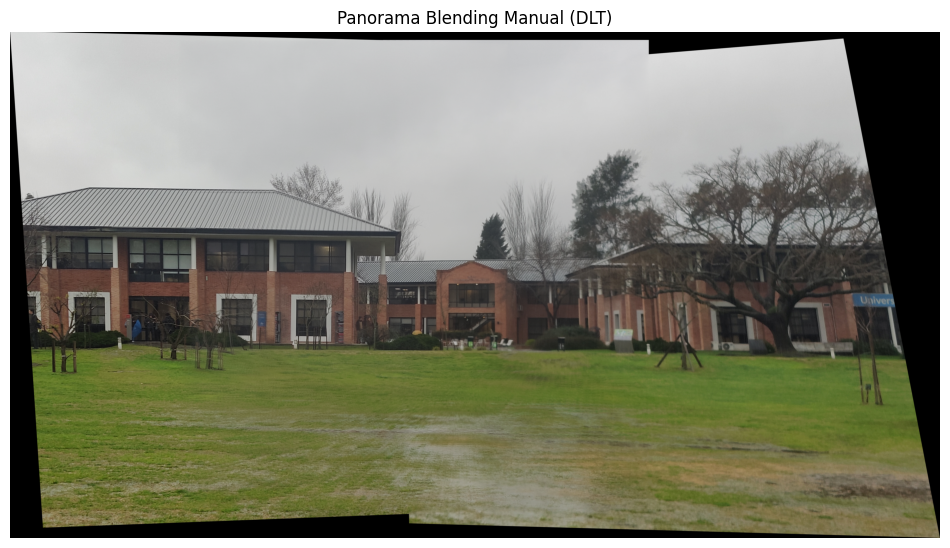

In [134]:
# Homographies
H01_manual = dlt_homography(src0, dst1_from0) # left
H21_manual = dlt_homography(src2, dst1_from2) # right

panorama_stitched_manual, _ = stitching_panorama(udesa1, udesa0, udesa2, H01_manual, H21_manual)
panorama_blended_manual = blending_panorama(udesa1, udesa0, udesa2, H01_manual, H21_manual)

plot_panorama(panorama_stitched_manual, "Panorama Stitching Manual (DLT)")
plot_panorama(panorama_blended_manual, "Panorama Blending Manual (DLT)")

=== PANORAMA STITCHING Y BLENDING CON RANSAC v0 ===
  Iteración 0: 6 inliers (mejor hasta ahora)
  Iteración 45: 19 inliers (mejor hasta ahora)
  Iteración 0: 4 inliers (mejor hasta ahora)
  Iteración 36: 5 inliers (mejor hasta ahora)
  Iteración 42: 6 inliers (mejor hasta ahora)
Optimal size: 5550 x 3295
Optimal size: 5550 x 3295


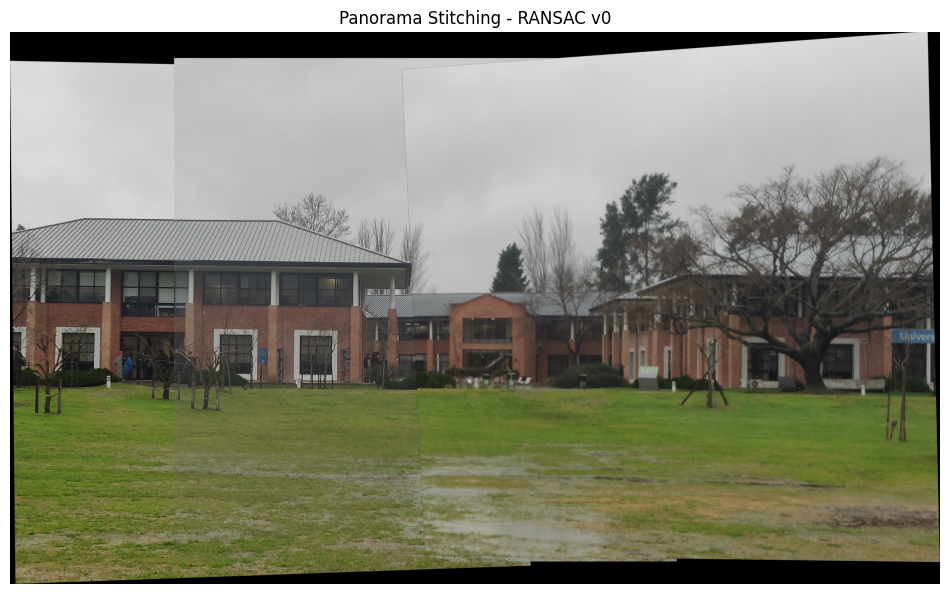

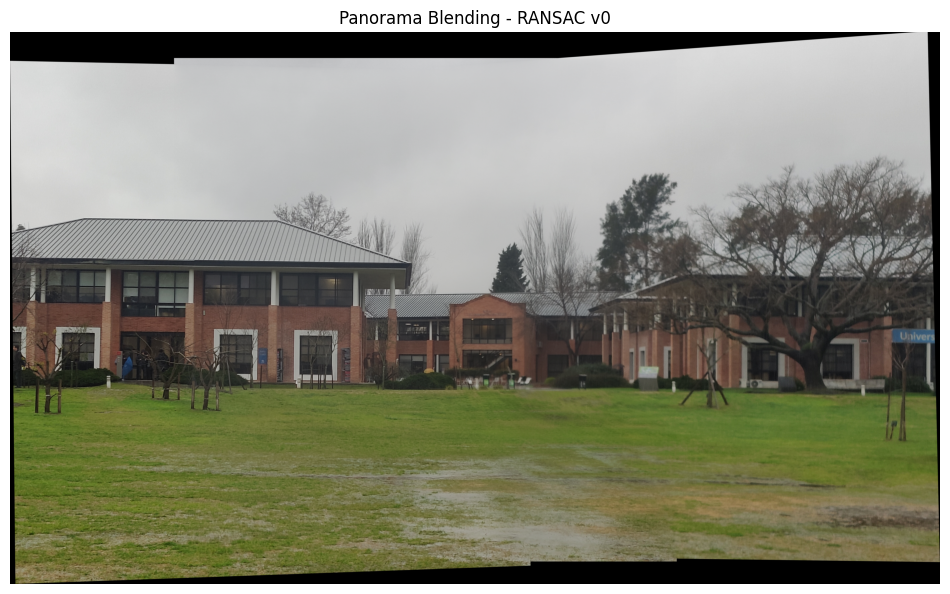

  Iteración 0: 6 inliers (mejor hasta ahora)
  Iteración 322: 11 inliers (mejor hasta ahora)
  Iteración 521: 12 inliers (mejor hasta ahora)
  Iteración 0: 6 inliers (mejor hasta ahora)
  Iteración 7: 14 inliers (mejor hasta ahora)
  Iteración 321: 15 inliers (mejor hasta ahora)
Optimal size: 5381 x 6080
Optimal size: 5381 x 6080


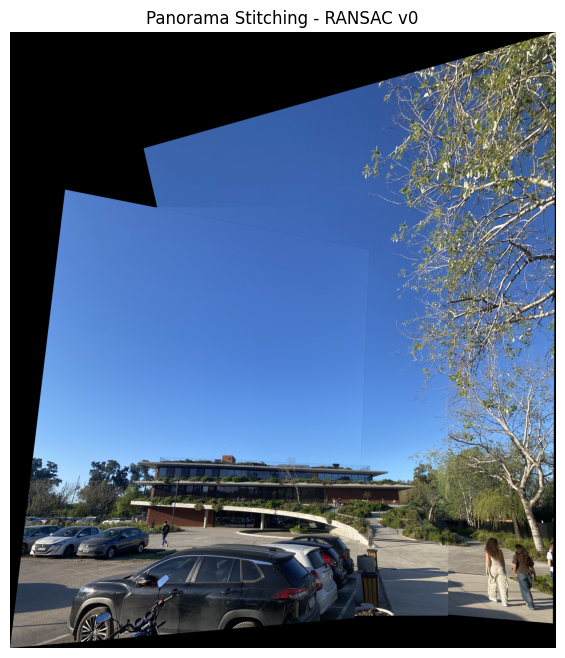

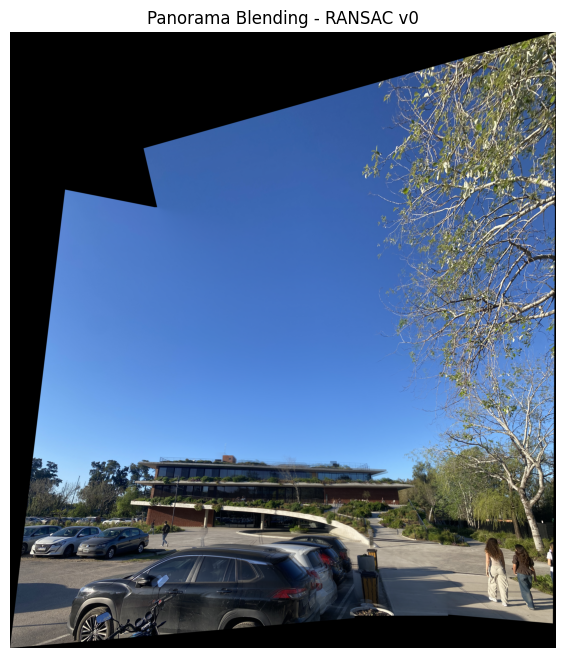

  Iteración 0: 4 inliers (mejor hasta ahora)
  Iteración 0: 7 inliers (mejor hasta ahora)
Optimal size: 5234 x 5513
Optimal size: 5234 x 5513


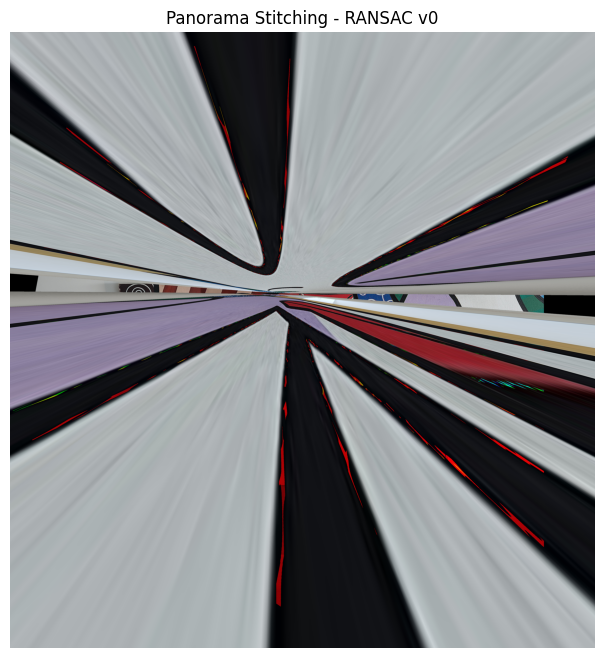

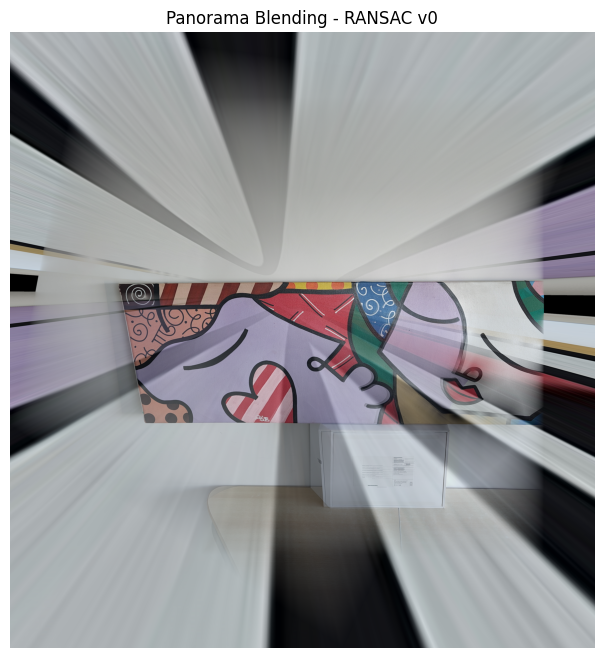

In [137]:
def panoramator_ransac0(anchorImg, leftImg, rightImg):
    H_left_to_anchor, _ = ransac_v0(anchorImg, leftImg, best_sift_params)
    H_right_to_anchor, _ = ransac_v0(anchorImg, rightImg, best_sift_params)
    panorama, _ = stitching_panorama(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor)
    panorama_blended = blending_panorama(anchorImg, leftImg, rightImg, H_left_to_anchor, H_right_to_anchor)
    plot_panorama(panorama, "Panorama Stitching - RANSAC v0")
    plot_panorama(panorama_blended, "Panorama Blending - RANSAC v0")

nuestra0 = cv2.imread("img/lejos0.jpg")
nuestra1 = cv2.imread("img/lejos1.jpg")
nuestra2 = cv2.imread("img/lejos2.jpg")

# Run panoramators
print("=== PANORAMA STITCHING Y BLENDING CON RANSAC v0 ===")
panoramator_ransac0(udesa1, udesa0, udesa2)
panoramator_ransac0(nuestra1, nuestra0, nuestra2)
panoramator_ransac0(cuadro1, cuadro0, cuadro2)

In [136]:
# a litte numerical test on the manual homographies...
errors = []
for s, d in zip(src0, dst1_from0):
    pred = apply_H(H01_manual, s)
    errors.append(np.linalg.norm(pred - d))
print("Mean reprojection error left→anchor:", np.mean(errors))

Mean reprojection error left→anchor: 8.845979854971987e-10
